% ISOM 3025 Lect11
% Yi Ding
% 04 December 2022

# Lecture 11: Graphs and  Misinformation spreading


## Outlines

In this lecture:


* Introducing social network models
* Simulate misinformation spreading




## Modeling the Social Network
We have studied some network-like systems earlier like the state transition of the Markov
model. 


### Graph models

In this chapter, we will study general networks that can represent arbitrary
connectivity of a community. Let’s first introduce some terminologies.
Network and graph are usually be used interchangeably. For consistency with other literature, I will use graphs for the
following content.


A graph is consistent with *nodes* and *edges*. 

For example, the following  graph has five nodes
and six edges.
![](Graph1.jpg)
Figure 9-1 of LN
The graph in Figure 9-1 is also a connected graph because you can reach any node
to any other by traversing the edges. This is not always true. 



The following graph is a disconnected graph.

![](Graph2.jpg)
 A disconnected graph example. Figure 9-2 of LN. 
 
This graph has five disconnected clusters (also called communities). They are not
connected through edges.


The following graph is a directional multigraph. The edges are directional, and multiple
edges are allowed. For example, there are two edges between nodes 2 and 3. Another
interesting edge is the loop edge that points to the node itself for nodes 0, 1, and 2. With
proper modeling, a loop can represent a tweet’s self-retweet or similar actions.

![](Graph3.jpg)
Figure 9-3 of LN. A directed graph with self-loops

Nodes and edges can also have attributes. For example, nodes can have weights
that indicate how influential they are in the graph, while edges’ weights can represent
how strong the bondings are between two nodes. To model a social network, we need to
assign certain attributes to graph elements, either intrinsic or calculated.




### Modeling social network using graphs --- Twitter ecosystem

#### Model Characteristics
Let’s define our social network, specifically the Twitter ecosystem, using a graph. Misinformation has never been so deadly in the age of COVID-19. On social networks like Twitter and Facebook, conspiracy theories about the origin of the
virus, the treatment of the virus, and vaccination are rampaging. They often spread
in communities and circles and echo with other conspiracy theories about the US
presidential elections. Such misinformation and conspiracy theories reinforce each
other and form a waterproof echo chamber. The spreader of misinformation may be unaware of the incorrectness or harmfulness of
the wrong information. In the following, we will study how misinformation spreads with a
network/graph setting.

Question: in the Twitter ecosystem network, what are the nodes and edges?



Each node represents an account, and each edge represents a following relationship.


Information can therefore flow from the followee to the follower through posting tweets.
Think about the properties of a Twitter account.

The most important indicator of
an account’s influence is the number of followers; in our case, it is exactly the number
of outgoing edges. 
In graph theory, it has a name: out-degree, the number of outgoing
edges. 

Similarly, the in-degree counts the number of incoming edges. The larger the out-degree
is, the more accounts on the social network can be potentially influenced.

We want to also borrow some concepts from the previous chapter. We will partition
the nodes into four categories, borrow some ideas from the SIR model:

* sources of misinformation, 
* susceptible, 
* infected, and 
* recovered. 

The sources of misinformation are people that who start the misinformation.

The susceptible are accounts who haven’t been exposed to misinformation; they have a probability to be infected if the people they
follow are the sources of the misinformation or infected. 

The infected nodes are like the
infected patients in the disease spreading simulation that they actively influence their
followers by retweeting and sharing misinformation. 

The recovered nodes are accounts who either intrinsically resist, R for both resistance and recovered, misinformation or
recover from misinformation pollution.


![](Graph_SN_Char.jpg)
Table 9-1 of LN. Properties of nodes/accounts in a social network

In summary, we use the properties in the above tale to characterize a node on the graph.

The influence power is not changeable because our social network is not dynamic.
If we allow the follower-followee relationship to change during the simulation, which is
much more realistic, then the influence power of a node will change if fewer and fewer
accounts follow it.

#### Misinformation spreading machanism
Now, we have all the static settings laid out. The next step is to define the mechanism
that governs the misinformation spreading. 


* Starting with a few nodes (sourse), likely malicious, begins the spreadingmisinformation. 

* Their susceptible followers will respond to the misinformation and react. The followers may become infected or stay susceptible, depending on their resistence level. We suppose that when resistence level is lower than a random threshold, the follower will be infected. 

* If a follower becomes infected, the follower’s followers will also be exposed to misinformation and so on and so forth.

* At any time, a infected node has a chance to recover, depending on whether the resistency level is higher than a random threshold.

* If the infected node does not recover, then her/his resistency level drops further. (self-belief reinforced)

* At any time, a recovered node has a chance to become susceptible, depending on whether the resistency level is higher than a random threshold.

* If the recovered node does not fall back to susceptible , then her/his resistency level increases further. (self-belief reinforced)


* The probabilities of getting infected are  dynamic. For example, if a node is exposed to multiple sources of misinformation, then the chance that they become infected can become very high, while the chance of recovering can be strongly suppressed.



Our logic is based on the observation of accounts’ behaviors on social media. The
source of the information is always trying to influence the followers. A susceptible
person will be infected if their resistance is smaller than a random number.
For an infected person, there is a chance to become recovered by comparing against
a random number, but if it fails, the resistance will be halved or reduced by a random
number, whichever is larger.
For a recovered person, the resistance will be increased, up to 100% immune, if the
resistance is greater than a random number in each round; otherwise, the person will fall
back to the susceptible domain.

Next, we illustrate the machanism through the following simulation.

## Simulate Misinformation Spreading


### Simple Cases
Let’s start with a simple case, a graph with only five nodes.

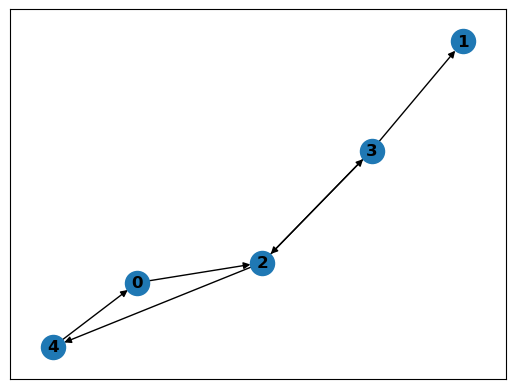

In [109]:
import networkx as nx
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sg = nx.fast_gnp_random_graph(n=5, p=0.2, seed = 3, directed = True)
pos=nx.spring_layout(sg,seed=5)
nx.draw_networkx_nodes(sg, pos, ax=ax)
nx.draw_networkx_labels(sg, pos, ax=ax, font_weight='bold')
nx.draw_networkx_edges(sg, pos, ax=ax, edgelist= sg.edges());


Networkx is a powerful Python library to manipulate graphs. Its syntax is quite
straightforward. The only non-intuitive method in the preceding code is fast_gnp_
random_graph. It is a built-in graph generator that, in this example, generates 5 nodes
and arbitrarily connects every pair with a probability of 20%. You can choose to generate
a directed graph and set the random seed for reproducibility as well. I choose the name
sg because it is indeed a small graph.
We can check the nodes and edges of the graph by running the following:


In [110]:
sg.nodes, sg.edges



(NodeView((0, 1, 2, 3, 4)),
 OutEdgeView([(0, 2), (2, 3), (2, 4), (3, 1), (3, 2), (4, 0)]))

We can also check the neighbors of a specific node:


In [111]:
print(list(sg.neighbors(1)))
#For node 1, no nodes folow 1, hence return empty nodes
#To see all neighbors including the followee, we use
print(list(nx.all_neighbors(sg,1)))


[]
[3]


neighbors method only returns the successors, i.e., the people that follow the nodes.

all_neighbors method returns both followees and followers (in that order). 

In [112]:
print(list(sg.neighbors(2)))
#For node 1, no nodes folow 1, hence return empty nodes
#To see all neighbors including the followee, we use
print(list(nx.all_neighbors(sg,2)))

[3, 4]
[0, 3, 3, 4]


In [113]:

#First, let’s define some helpful data structures:
class State:
    SOURCE = 0
    SUSCEPTIBLE = 1
    INFECTED = 2
    RECOVERED = 3

STATE2COLOR = {
    State.SOURCE: "red",
    State.SUSCEPTIBLE: "grey",
    State.INFECTED: "orange",
    State.RECOVERED: "green"
}



We can now initialize the attributes of our simple five-node graph as follows:


In [189]:
import numpy as np
np.random.seed(1)
for node in sg.nodes:
    sg.nodes[node]["influence"] = len(list(sg.neighbors(node)))
    if node == 2:
        sg.nodes[node]["state"] = State.SOURCE
        sg.nodes[node]["resistance"] = 0
    else:
        sg.nodes[node]["state"] = State.SUSCEPTIBLE
        sg.nodes[node]["resistance"] = np.random.random()

We can now plot the graph with color indicating the initial state of the accounts. As
the dictionary STATE2COLOR denotes, red means the source of the misinformation.


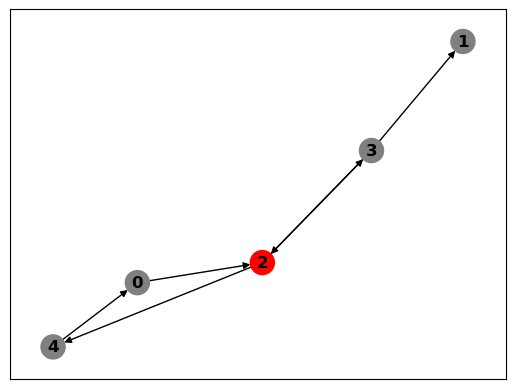

In [190]:
fig, ax = plt.subplots()
pos=nx.spring_layout(sg,seed=5)
nx.draw_networkx_nodes(sg, pos, ax=ax,node_color=[STATE2COLOR[sg.nodes[node]["state"]] for node in sg.nodes])
nx.draw_networkx_labels(sg, pos, ax=ax, font_weight='bold')
nx.draw_networkx_edges(sg, pos, ax=ax, edgelist= sg.edges());
#help(nx.draw_networkx_nodes)

Next we are ready to build up the machanism of information spreading.



In [191]:

def update_state(sg, sg_copy, node):
# update states in sg_copy to achieve simultaneous updates
    successors = set(sg.neighbors(node))
    predecessors = set(nx.all_neighbors(sg,node)) - successors
    double_direction=[]
    for x in list(nx.all_neighbors(sg,node)):
        if list(nx.all_neighbors(sg,node)).count(x) > 1:
            double_direction.append(x)
            
    predecessors = predecessors.union(set(double_direction))
        # why? because there are double directional follows
    state = sg.nodes[node]["state"]
    
    # case one:
    if state == State.SOURCE: # will not update status if the node is the source
        return
    # case two:
    elif state == State.RECOVERED: # if the node is a "recovered" node
        if sg.nodes[node]["resistance"] > np.random.random():# check whether resistance is greater a random threshold
            sg.nodes[node]["resistance"] = min(sg.nodes[node]["resistance"]*2,sg.nodes[node]["resistance"] + np.random.random(), 1)
            # self-reinforce
        else:
            sg_copy.nodes[node][state] = State.SUSCEPTIBLE # state change to susceptible
            
    # case three:
    elif state == State.SUSCEPTIBLE: # if the node is a "susceptible" node
        # first check the source of influence
        source_influenced = State.SOURCE in [sg_copy.nodes[pre]["state"] for pre in predecessors]
        infected_influenced = State.INFECTED in [sg_copy.nodes[pre]["state"] for pre in predecessors]
        
        # if the node is follower of misinformation source, she is susceptible, of the node is follower of infected nodes, she is also susceptible. 
            
        if source_influenced or infected_influenced:
            if sg.nodes[node]["resistance"] < np.random.random():# check resistance level againt a random threshold
                sg_copy.nodes[node]["state"] = State.INFECTED

    #case four:
    elif state == State.INFECTED:
        # infected has a chance to become recovered
        if sg.nodes[node]["resistance"] > np.random.random():
            sg_copy.nodes[node]["state"] = State.RECOVERED
        else:
            sg.nodes[node]["resistance"] = max(sg.nodes[node]["resistance"]/2, sg.nodes[node]["resistance"] - np.random.random())
            # self-reinforced belief
    #other cases, not supported
    else:
        print("Unsupported state, exit.")

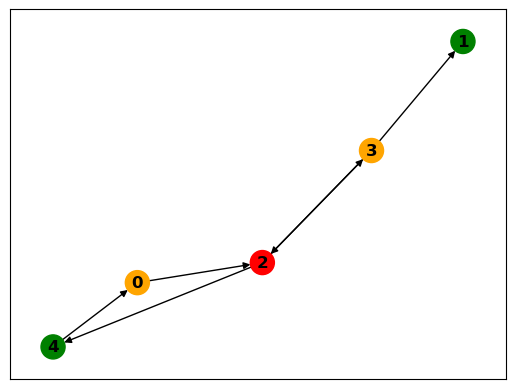

In [192]:
for _ in range(20):
    sg_copy = sg.copy()
    for node in sg.nodes:
        update_state(sg, sg_copy, node) # update states into sg_copy, sg's resistance level is also updated. 
    # copy state
    for node in sg.nodes:
        sg.nodes[node]["state"] = sg_copy.nodes[node]["state"]
        
fig, ax = plt.subplots()
pos=nx.spring_layout(sg,seed=5)
nx.draw_networkx_nodes(sg, pos, ax=ax,node_color=[STATE2COLOR[sg.nodes[node]["state"]] for node in sg.nodes])
nx.draw_networkx_labels(sg, pos, ax=ax, font_weight='bold')
nx.draw_networkx_edges(sg, pos, ax=ax, edgelist= sg.edges());
#help(nx.draw_networkx_nodes)        
        

Next, let’s explore the system step by step.
We already see the initial state, but let’s also take note of the resistance numbers:



In [193]:

import numpy as np
np.random.seed(1)
for node in sg.nodes:
    sg.nodes[node]["influence"] = len(list(sg.neighbors(node)))
    if node == 2:
        sg.nodes[node]["state"] = State.SOURCE
        sg.nodes[node]["resistance"] = 0
    else:
        sg.nodes[node]["state"] = State.SUSCEPTIBLE
        sg.nodes[node]["resistance"] = np.random.random()

{node: sg.nodes[node]["resistance"] for node in sg.nodes}

{0: 0.417022004702574,
 1: 0.7203244934421581,
 2: 0,
 3: 0.00011437481734488664,
 4: 0.30233257263183977}

To have a better visualization of evoluation of resistance on the graph, we plot togather the resistance with the graph. 




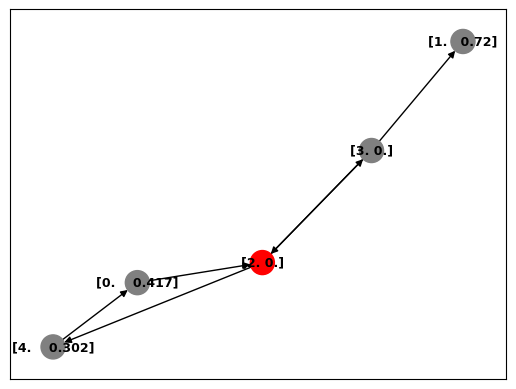

In [194]:

res_labels=pos.copy()
for node in pos.keys():
    res_labels[node][0]=node
    res_labels[node][1]=round(sg.nodes[node]["resistance"],3)
res_labels

fig, ax = plt.subplots()
pos=nx.spring_layout(sg,seed=5)

nx.draw_networkx_nodes(sg, pos, ax=ax,node_color=[STATE2COLOR[sg.nodes[node]["state"]] for node in sg.nodes])
nx.draw_networkx_labels(sg, pos, labels=res_labels,ax=ax, font_weight='bold',font_size=9)
nx.draw_networkx_edges(sg, pos, ax=ax, edgelist= sg.edges());
#help(nx.draw_networkx_labels)


We see that nodes 3 and 4 are followers of information source 2. 

Node 3 has a very low resistance. We then will see that node 3 will be very likely to get infected and also stay being infected. 


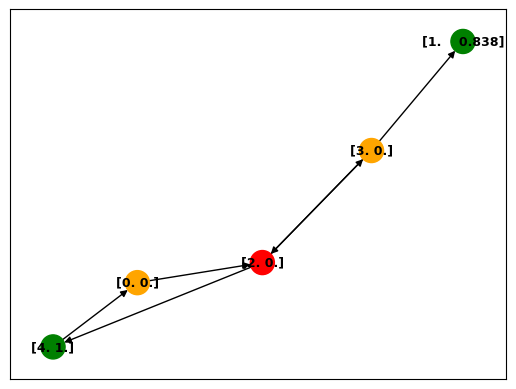

In [210]:
# period 2, ...
sg_copy = sg.copy()
for node in sg.nodes:
    update_state(sg, sg_copy, node) # update states into sg_copy, sg's resistance level is also updated. 
    # copy state
for node in sg.nodes:
    sg.nodes[node]["state"] = sg_copy.nodes[node]["state"]

    
# draw    
res_labels=pos.copy()
for node in pos.keys():
    res_labels[node][0]=node
    res_labels[node][1]=round(sg.nodes[node]["resistance"],3)
res_labels

fig, ax = plt.subplots()
pos=nx.spring_layout(sg,seed=5)

nx.draw_networkx_nodes(sg, pos, ax=ax,node_color=[STATE2COLOR[sg.nodes[node]["state"]] for node in sg.nodes])
nx.draw_networkx_labels(sg, pos, labels=res_labels,ax=ax, font_weight='bold',font_size=9)
nx.draw_networkx_edges(sg, pos, ax=ax, edgelist= sg.edges());
#help(nx.draw_networkx_labels)


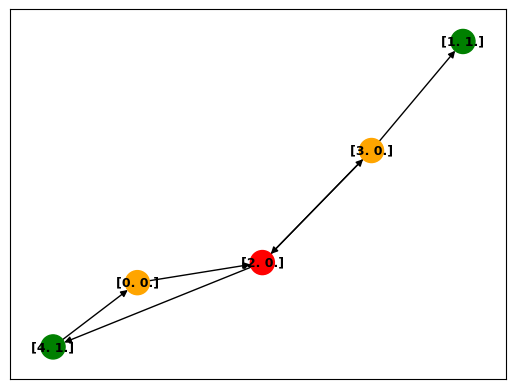

In [211]:

for _ in range(20):
    sg_copy = sg.copy()
    for node in sg.nodes:
        update_state(sg, sg_copy, node) # update states into sg_copy, sg's resistance level is also updated. 
    # copy state
    for node in sg.nodes:
        sg.nodes[node]["state"] = sg_copy.nodes[node]["state"]
        
# draw    
res_labels=pos.copy()
for node in pos.keys():
    res_labels[node][0]=node
    res_labels[node][1]=round(sg.nodes[node]["resistance"],3)
res_labels

fig, ax = plt.subplots()
pos=nx.spring_layout(sg,seed=5)

nx.draw_networkx_nodes(sg, pos, ax=ax,node_color=[STATE2COLOR[sg.nodes[node]["state"]] for node in sg.nodes])
nx.draw_networkx_labels(sg, pos, labels=res_labels,ax=ax, font_weight='bold',font_size=9)
nx.draw_networkx_edges(sg, pos, ax=ax, edgelist= sg.edges());
#help(nx.draw_networkx_labels)
    


It appears that after several iteration, it reaches a states that some people will be strongly believe the information, and some strongly do not believe. 


Some extensions:
    
1. In previous example, we don't incorporate the effect of the number of mis-information exposure in resistance. Intuitively, the more influence sources are exposed at the same time, the lower resistance should be. 

2. What will be the effect of multiple information sources?

3. What will be effect of connection rate?

4. What will be the effect of the size of the network? (small ---> big)

5.  Distinguish between the influencing power of different individuals (ordinary, authorities influencers, different threshold level)?

In [ ]:
Ref: LN Chapter 9